# Analysis 3
- Perform head2head performance analysis between top 3 teams
- compare head2head analysis between any two teams
- identify number of matches won, lost and draw between any two teams

In [126]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [127]:
%matplotlib inline

In [1]:
import glob
import json
import datetime
import os
#import fnmatch
import csv
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from io import StringIO
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
directory="Data/Football/Head2Head/Head2HeadByFixture"
count=0
match_dic = {}
match_head2head_df = pd.DataFrame(columns = ['team1','team2','matchCount','team1win','team2win','draw'])
count=0
for root, dirs, files in os.walk(directory):
     for file in files:
        with open(os.path.join(root, file), "r") as f:
            data = json.load(f)
            team1=data['fixture']['homeTeamName']
            team2=data['fixture']['awayTeamName']
            team1win= data['head2head']['homeTeamWins']
            team2win= data['head2head']['awayTeamWins']
            draw=data['head2head']['draws']
            matchCount=data['head2head']['count']
            match_head2head_df.loc[count]=[team1,team2,matchCount,team1win,team2win,draw]
            count+=1            

            

In [3]:
#match_head2head_df[['matchCount','team1win','team2win','draw']].astype(int,copy=False)
match_head2head_df.head(20)


,team1,team2,matchCount,team1win,team2win,draw
0,AFC Bournemouth,Arsenal FC,4.0,0.0,3.0,1.0
1,AFC Bournemouth,Aston Villa FC,2.0,1.0,1.0,0.0
2,Arsenal FC,Aston Villa FC,46.0,26.0,6.0,14.0
3,AFC Bournemouth,Chelsea FC,4.0,1.0,3.0,0.0
4,Arsenal FC,Chelsea FC,50.0,18.0,17.0,15.0
5,Aston Villa FC,Chelsea FC,46.0,11.0,23.0,12.0
6,AFC Bournemouth,Crystal Palace FC,4.0,1.0,1.0,2.0
7,Arsenal FC,Crystal Palace FC,14.0,9.0,2.0,3.0
8,Aston Villa FC,Crystal Palace FC,12.0,3.0,4.0,5.0
9,Chelsea FC,Crystal Palace FC,14.0,10.0,3.0,1.0


In [124]:
team1='Chelsea FC'
team2='Leicester City FC'

match_head2head_df_copy=match_head2head_df.copy() 
values=match_head2head_df_copy.loc[(((match_head2head_df_copy['team1']== team1)|(match_head2head_df_copy['team2']== team1))
                                            &(( match_head2head_df_copy['team2']==team2)|( match_head2head_df_copy['team1']==team2)))][['team1','team2','team1win','team2win','draw']]#.rename(columns = {'team1win':team1+' Win','team2win':team2+' Win',}).astype(int)
#l= values.tolist()
print(values['team1'].tolist(), team1)
if team1 == values['team1'].tolist()[0]:
    print('Hi')
else:
    print('hii')
values

    #print(values['team1'].to_string())
#if team1 in match_head2head_df_copy['team2']:
 #   values.rename(columns = {'team1win':team2+' Win','team2win':team1+' Win',}).astype(int)
#else:
  #  values.rename(columns = {'team1win':team1+' Win','team2win':team2+' Win',}).astype(int)

#.rename(columns = {'team1win':team1+' Win','team2win':team2+' Win',}).astype(int)
#print(values)
#val_ser=values.stack()
#data_val_df=val_ser.to_frame().reset_index().rename(columns = {'level_1':'Data_Lable',0:'Data_Value',})[['Data_Lable','Data_Value']]


['Chelsea FC'] Chelsea FC
Hi


,team1,team2,team1win,team2win,draw
18,Chelsea FC,Leicester City FC,13.0,4.0,5.0


In [148]:
t1=list(match_head2head_df['team1'].unique())
team1 = widgets.Dropdown(options=t1,value=t1[3],description='Select Team1:',)
#team1.observe(on_change, t1)
t2= list(match_head2head_df['team1'].unique())
#list(match_head2head_df[match_head2head_df['team1'] team1]['team1'].unique())
team2=  widgets.Dropdown(options=t2,value=t2[4],description='Select Team2:',)
                                  
def plotit(team1,team2):
    if team1!=team2:
    #print(team1,team2)
        match_head2head_df_copy=match_head2head_df.copy()    
        #print(match_head2head_df_copy[(match_head2head_df_copy['team1']==team1)& ( match_head2head_df_copy['team2']==team2)])
        values=match_head2head_df_copy.loc[(((match_head2head_df_copy['team1']== team1)|(match_head2head_df_copy['team2']== team1))
                                            &(( match_head2head_df_copy['team2']==team2)|( match_head2head_df_copy['team1']==team2)))][['team1win','team2win','draw']].rename(columns = {'team1win':team1+' Win','team2win':team2+' Win',}).astype(int)
        #print(values)
        val_ser=values.stack()
        data_val_df=val_ser.to_frame().reset_index().rename(columns = {'level_1':'Data_Lable',0:'Data_Value',})[['Data_Lable','Data_Value']]
        colors=["#5151CC", "#FFC200", "#939393"]
        #print(data_val_df)
        
        plt.figure(1, figsize=(6,6)) 
        ax = plt.axes([0.1, 0.1, 0.8, 0.8]) 
        labels = data_val_df['Data_Lable']
        fracs = data_val_df['Data_Value'] 
        total = sum(fracs) 
        explode=(0.05, 0.05, 0.05) 
        plt.pie(fracs, explode=explode,colors=colors, labels=labels, autopct= lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90) 
        plt.show()
    else:
        print("Please select two different teams")
#data_val_df





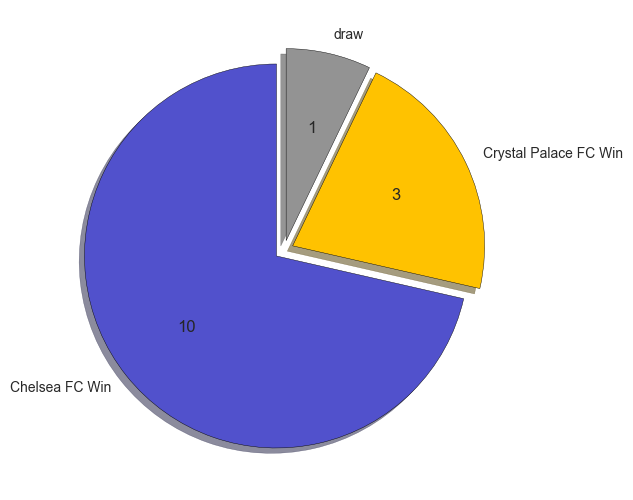

In [149]:

interactive(plotit, team1=team1,team2=team2,)